# EDA
This file should be utilized to do EDAs

# Import Files

In [4]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import redshift_connector

# Redshift Connection

In [5]:
conn = redshift_connector.connect(
    host='cspc-workgroup.783764604578.us-west-2.redshift-serverless.amazonaws.com',
    database='cspc5071-dsa',
    port=5439,
    user='python_user',
    password='Database123!' # Not best practice but who cares :))
 )
cursor = conn.cursor()

# Query to get the list of tables in the specified schema
query = f"""
SELECT table_name
FROM information_schema.tables
WHERE table_schema = 'public'
AND table_type = 'BASE TABLE';
"""

cursor.execute(query)
tables = cursor.fetchall()

print(f"Tables in schema public:")
for table in tables:
    print(table[0]) # These are all the data we have in AWS redshift.

Tables in schema public:
average_egg_price
us_national_outbreaks
h5n1_outbreaks
us_national_disaster
covid_hospitalization
us_population


In [6]:
# Function to query to redshift: Returns a dataframe 
def querying_to_redshift(query, cursor):
    cursor.execute(query)
    df : pd.DataFrame = cursor.fetch_dataframe()

    return df

In [14]:
bird = pd.read_csv("../data/date_organized_avian_flu_bird.csv", index_col = 0)
human = pd.read_csv("../data/date_organized_avian_flu_human.csv", index_col = 0)

In [15]:
bird.head(), human.head()

(     FullGeoName  FIPS Codes County Name         State Outbreak Date  \
 0    MI, Jackson       26075     Jackson      Michigan    2024-12-31   
 1  CA, Riverside        6065   Riverside    California    2024-12-31   
 2      CA, Butte        6007       Butte    California    2024-12-31   
 3      SD, Miner       46097       Miner  South Dakota    2024-12-31   
 4     MI, Ottawa       26139      Ottawa      Michigan    2024-12-31   
 
                                           Flock Type  Flock Size  State Count  \
 0                                   WOAH Non-Poultry           9            1   
 1  Commercial Table Egg Layer; WOAH Non-Poultry; ...     1503370            1   
 2  WOAH Non-Poultry; Commercial Raised for Releas...       45890            0   
 3                                       WOAH Poultry        1500            1   
 4                        Commercial Turkey Meat Bird      447700            0   
 
    Outbreaks  Counties  yyyy_mm  
 0          1         1  2024-1

In [16]:
bird_plot = bird.groupby('yyyy_mm').size().reset_index(name='Flock_Count')
bird_plot

,yyyy_mm,Flock_Count
0,2022-02,6
1,2022-03,31
2,2022-04,41
3,2022-05,30
4,2022-06,4
5,2022-07,2
6,2022-08,8
7,2022-09,33
8,2022-10,47
9,2022-11,41


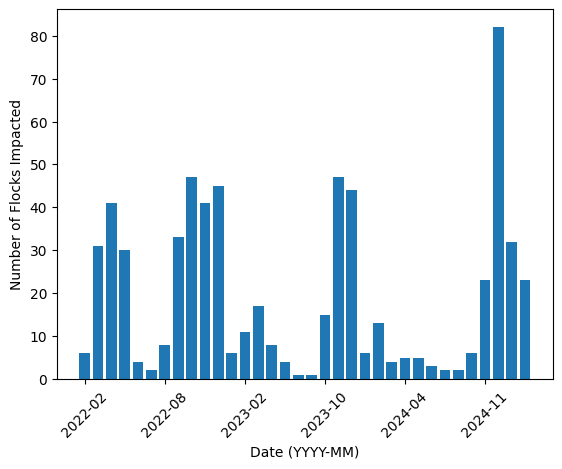

In [17]:
plt.bar(bird_plot['yyyy_mm'], bird_plot['Flock_Count'])
tick_positions = bird_plot['yyyy_mm'][::6]
plt.xticks(tick_positions, rotation=45)
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Number of Flocks Impacted')
plt.show()

In [18]:
flocks_impacted_size = bird.groupby('yyyy_mm')['Flock Size'].sum().reset_index(name='Total_Flock_Size')
flocks_impacted_size.head()

,yyyy_mm,Total_Flock_Size
0,2022-02,348550
1,2022-03,9988239
2,2022-04,863435
3,2022-05,189266
4,2022-06,27343


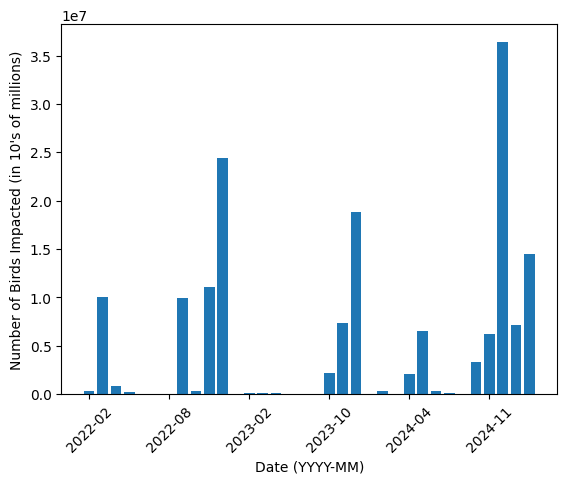

In [19]:
plt.bar(flocks_impacted_size['yyyy_mm'], flocks_impacted_size['Total_Flock_Size'])
tick_positions = flocks_impacted_size['yyyy_mm'][::6]
plt.xticks(tick_positions, rotation=45)
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Number of Birds Impacted (in 10\'s of millions)')
plt.show()

In [20]:
people_impacted = human.groupby('yyyy_mm')['Human cases with highly pathogenic avian influenza A/H5N1 (monthly)'].sum().reset_index(name='People_Count')
people_impacted.head()

,yyyy_mm,People_Count
0,1997-01,54
1,1998-01,0
2,1999-01,0
3,2000-01,0
4,2001-01,0


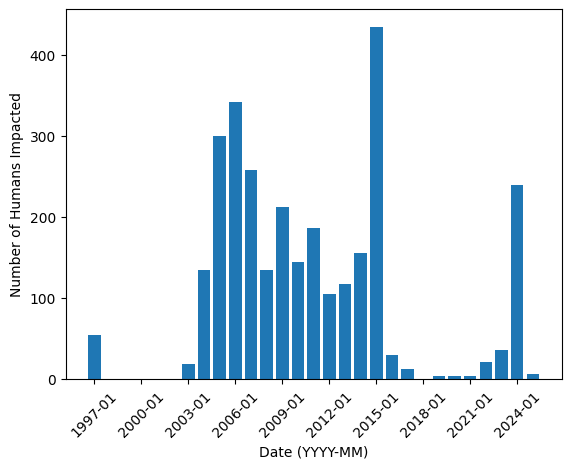

In [21]:
plt.bar(people_impacted['yyyy_mm'], people_impacted['People_Count'])
tick_positions = people_impacted['yyyy_mm'][::3]
plt.xticks(tick_positions, rotation=45)
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Number of Humans Impacted')
plt.show()